### Background

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

### Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

##### Data Dictionary

+ S.No.: Serial number
+ Name: Name of the car which includes brand name and model name
+ Location: Location in which the car is being sold or is available for purchase
+ Year: Manufacturing year of the car
+ Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
+ Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
+ Transmission: The type of transmission used by the car (Automatic/Manual)
+ Owner: Type of ownership
+ Mileage: The standard mileage offered by the car company in kmpl or km/kg
+ Engine: The displacement volume of the engine in CC
+ Power: The maximum power of the engine in bhp
+ Seats: The number of seats in the car
+ New_Price: The price of a new car of the same model in dollars
+ Price: The price of the used car in dollars


#### Objective
+ To develop a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.
+ To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

In [1]:
# Importing necessary libraries to read csv
import numpy as np
import pandas as pd
import csv

# Libraries to help with visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Displays all columns and rows in data
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# Linear regression_model
from sklearn.linear_model import LinearRegression

# Libraries for Model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Input in Data into the notebook
df = pd.read_csv('used_cars_data-1.csv')

In [3]:
df.info() #View more information on the variable in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [4]:
df.isna().sum() #Figure out if there exists missing entries in our data

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

We notice that the engine Capacity, Power of the Vehicle, seats in a vehicle and the Price of the Vehicle have missing values

### Data Visualisations
+ We attempt to visualise the data to see what we can infer from it.

<AxesSubplot:xlabel='Fuel_Type', ylabel='Year'>

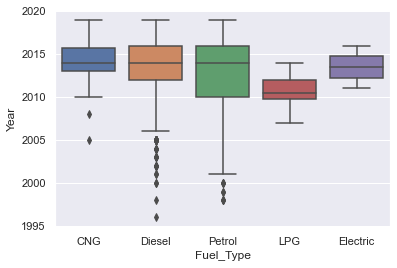

In [5]:
sns.boxplot(x = 'Fuel_Type', y = 'Year', data = df)

There are more Petrol driven cars available over the years

<AxesSubplot:xlabel='Fuel_Type', ylabel='New_Price'>

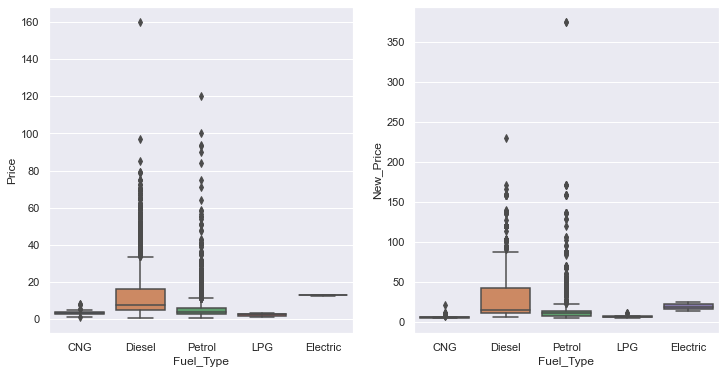

In [6]:
f, axes = plt.subplots(1,2,figsize = (12,6))
sns.boxplot(x='Fuel_Type',y='Price',  data=df ,ax=axes[0])
sns.boxplot(x='Fuel_Type',y='New_Price', data=df ,ax=axes[1])

There's no noticeable effect of the Fuel type on the price of the car

<AxesSubplot:xlabel='Transmission', ylabel='New_Price'>

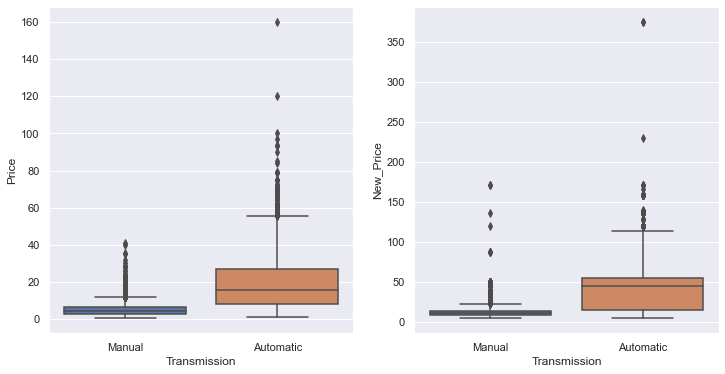

In [7]:
f, axes = plt.subplots(1,2,figsize = (12,6))
sns.boxplot(x='Transmission',y='Price',  data=df ,ax=axes[0])
sns.boxplot(x='Transmission',y='New_Price', data=df ,ax=axes[1])

More Automatic vehicles are in use compared to manual in both old and new vehicles. Yet, we notice a slight price decrease in the price of manual old cars meaning it may have a slight effect in the price

<AxesSubplot:xlabel='Seats', ylabel='New_Price'>

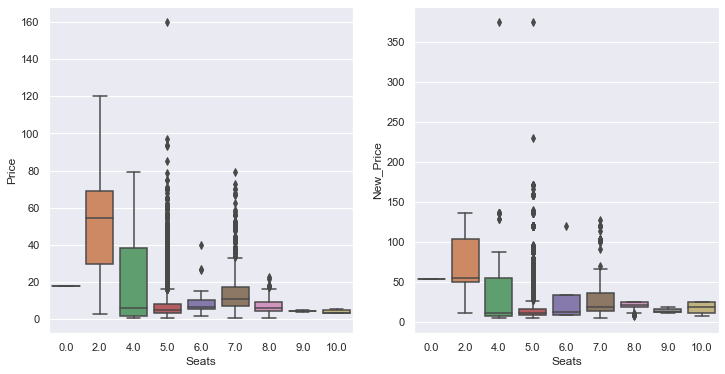

In [8]:
f, axes = plt.subplots(1,2,figsize = (12,6))
sns.boxplot(x='Seats',y='Price',  data=df ,ax=axes[0])
sns.boxplot(x='Seats',y='New_Price', data=df ,ax=axes[1])

We notice based from the boxplot that there are more 2 - 5 seater vehicles available and in the market.

<AxesSubplot:xlabel='Year', ylabel='New_Price'>

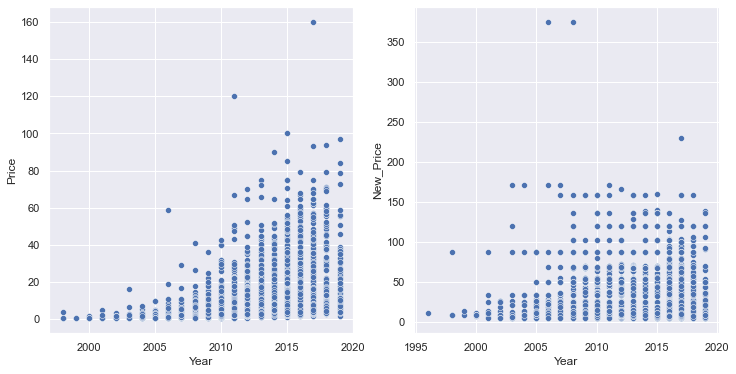

In [9]:
f, axes = plt.subplots(1,2,figsize = (12,6))
sns.scatterplot(x='Year',y='Price',  data=df ,ax=axes[0])
sns.scatterplot(x='Year',y='New_Price', data=df ,ax=axes[1])

Based on the graphs, 
+ The price of the vehicle seem to get higher as the years go by, whereas this isn't significantly noticed in New cars 

<AxesSubplot:xlabel='New_Price', ylabel='Name'>

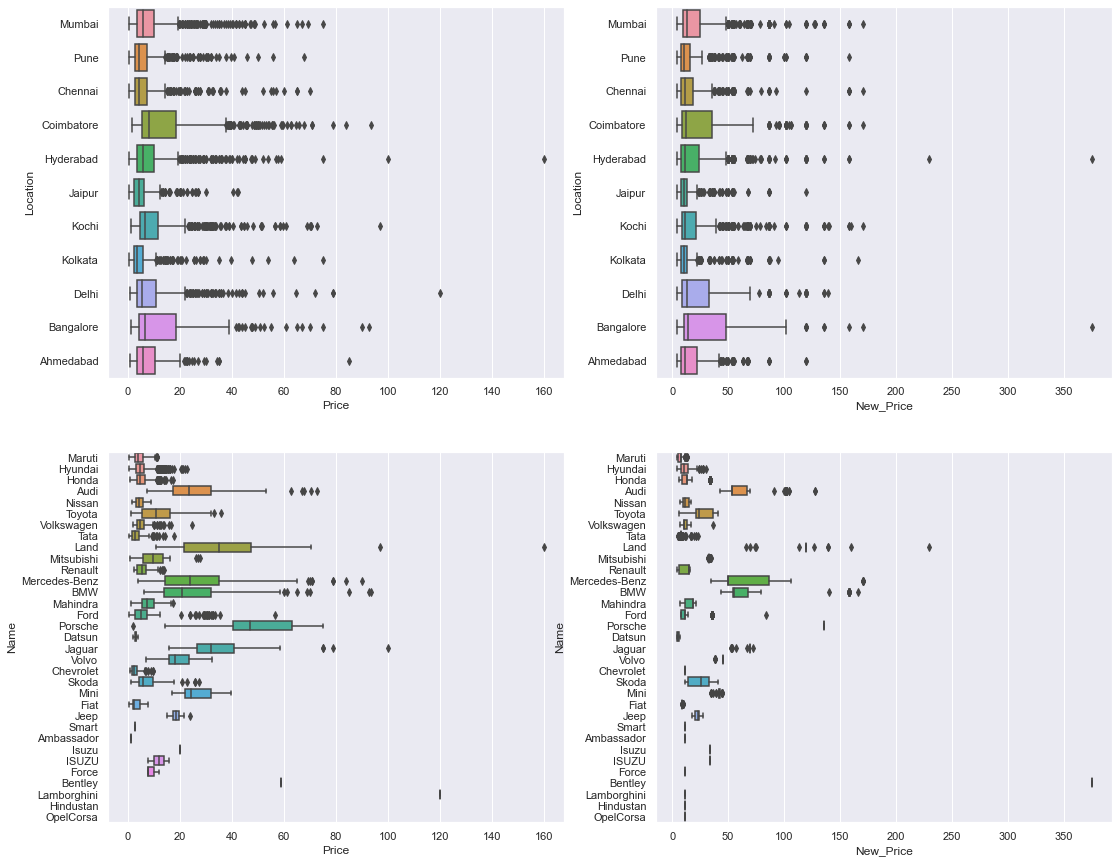

In [10]:
f, axes = plt.subplots(2,2,figsize = (18,15))
sns.boxplot(x='Price',y='Location',  data=df ,ax=axes[0,0])
sns.boxplot(x='New_Price',y='Location', data=df ,ax=axes[0,1])
sns.boxplot(x='Price',y=df['Name'].apply(lambda x: x.split(" ")[0]), data=df ,ax=axes[1,0])
sns.boxplot(x='New_Price',y=df['Name'].apply(lambda x: x.split(" ")[0]), data=df ,ax=axes[1,1])

+ From the data above the Location doesn't significantly affect the Price of the Vehicle.
+ The Brand of the Vehicle seem to differ by price 

### Data Transformation
This was done to reduce dimensionality in the data to improve the accuracy of the model, thereby generating new columns in the data

In [11]:
#the brand of the vehicle was split based on the vehicle type
df['Vehicle_Type'] = df['Name'].apply(lambda x: x.split(" ")[0]) 

In [12]:
# Because the Engine Capacity, Mileage and Power columns are of object types the data 
# is split inorder to converted to float types
df['Engine_metric'] = df['Engine'].astype(str).apply(lambda x: x.split(" ")[0]).astype(float)
df['Mileage_metric'] = df['Mileage'].astype(str).apply(lambda x: x.split(" ")[0]).astype(float)
df['Power_metric'] = df['Power'].astype(str).apply(lambda x: x.split(" ")[0]).astype(float)

In [13]:
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Type,Engine_metric,Mileage_metric,Power_metric
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,Maruti,998.0,26.60,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,Hyundai,1582.0,19.67,126.20
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,Honda,1199.0,18.20,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,Maruti,1248.0,20.77,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,Audi,1968.0,15.20,140.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN,Volkswagen,1598.0,20.54,103.60
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN,Volkswagen,1197.0,17.21,103.60
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN,Nissan,1461.0,23.08,63.10
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN,Volkswagen,1197.0,17.20,103.60


### Missing Entries

In [14]:
df.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
Vehicle_Type            0
Engine_metric          46
Mileage_metric          2
Power_metric          175
dtype: int64

I grouped the dataframe inorder to fill the missing entries by obtaining the mean of the engine capacity, power, mileage and price based on the vehicle brand.

In [15]:
missing_set = []
values = df.groupby('Vehicle_Type')
unique_values = df['Vehicle_Type'].unique() # a list of vehicle brand is created
updated_values = unique_values.tolist()

In [16]:
# Based on the group, the mean of the variables are collected and stored in the missing set list, 
# zipped with the brand and variables some of the variables still had nan means values
for x in updated_values:
    new_value = values.get_group(x)
    missing_set.append([new_value['Engine_metric'].mean(), new_value['Power_metric'].mean(), 
                       new_value['Mileage_metric'].mean(), new_value['Price'].mean(), new_value['Seats'].mean()])
Updated_values = dict(zip(updated_values,missing_set))

In [17]:
empty_price = df[df['Price'].isna()] #the empty price entries are obtained

In [18]:
# A function that replaces the empty entries with the new dictionary containing the mean values.
def update_all(df,row,empty):
    for i in row.items():
        for k,j in empty.iterrows():
            if j['Vehicle_Type'] == i[0]:
                df.loc[[k],'Engine_metric'],df.loc[[k],'Power_metric'],df.loc[[k],'Mileage_metric'],df.loc[[k],'Price'],df.loc[[k],'Seats'] = i[1][0],i[1][1],i[1][2],i[1][3],i[1][4]

In [19]:
update_all(df,Updated_values,empty_price)

In [20]:
df.isna().sum()

S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                46
Power                175
Seats                 42
New_Price              0
Price                  2
Vehicle_Type           0
Engine_metric         36
Mileage_metric         2
Power_metric         144
dtype: int64

In [21]:
#This function reduces dimensionality in the engine capacity by grouping them based on 500CC difference
def engine_metric(x):
    if x > 0 and x < 500:
        return 0
    elif x > 499 and x < 1000:
        return 1
    elif x > 999 and x < 1500:
        return 2
    elif x > 1499 and x < 2000:
        return 3
    elif x > 1999 and x < 2500:
        return 4
    elif x > 2499 and x < 3000:
        return 5
    elif x > 2999 and x < 3500:
        return 6
    elif x > 3499 and x < 4000:
        return 7
    elif x > 3999 and x < 4500:
        return 8
    elif x > 4499 and x < 5000:
        return 9
    elif x > 4999 and x < 5500:
        return 10
    else:
        return 11

In [22]:
df['Engine_metrics'] = df['Engine_metric'].apply(lambda x: engine_metric(x)) #Function is applied

In [23]:
# This function reduces dimensionality in the Mileage covered by the Vehicle by 
# grouping them based on 5 km/l or km/kg based on the fuel type
def mileage(x):
    if x == 0 or x < 5.00:
        return 0
    elif x > 4.00 or x < 10.00:
        return 1
    elif x > 9.00 or x < 15.00:
        return 2
    elif x > 14.00 or x < 20.00:
        return 3
    elif x > 19.00 or x < 25.00:
        return 4
    elif x > 24.00 or x < 30.00:
        return 5
    else:
        return 6

In [24]:
df['mileages'] = df['Mileage_metric'].apply(lambda x: mileage(x)) #Function is applied

In [25]:
#This function reduces dimensionality in the Power of the Vehicle by grouping them based on 50 bhp difference
def power(x):
    if x == 0 or x < 50.00:
        return 0
    elif x > 49.00 or x < 100.00:
        return 1
    elif x > 99.00 or x < 150.00:
        return 2
    elif x > 149.00 or x < 200.00:
        return 3
    elif x > 199.00 or x < 250.00:
        return 4
    elif x > 249.00 or x < 300.00:
        return 5
    elif x > 299.00 or x < 350.00:
        return 6
    elif x > 349.00 or x < 400.00:
        return 7
    elif x > 399.00 or x < 450.00:
        return 8
    elif x > 449.00 or x < 500.00:
        return 9
    elif x > 499.00 or x < 550.00:
        return 10
    else:
        return 11

In [26]:
df['powers'] = df['Power_metric'].apply(lambda x: power(x)) #Function is applied

In [27]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [28]:
# the owner type is grouped
def owner_value(x):
    if x == 'First':
        return 0
    elif x == 'Second':
        return 1
    elif x == 'Third':
        return 2
    else:
        return 3

In [29]:
df['owner'] = df['Owner_Type'].apply(lambda x: owner_value(x))

In [30]:
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [31]:
# Fuel type is grouped
def fuel_value(x):
    if x == 'CNG':
        return 0
    elif x == 'Diesel':
        return 1
    elif x == 'Petrol':
        return 2
    elif x == 'LPG':
        return 3
    else:
        return 4

In [32]:
df['fuel'] = df['Fuel_Type'].apply(lambda x: fuel_value(x))

In [33]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [34]:
# Function to group the transmission type.
def car_transmission(x):
    if x == 'Manual':
        return 0
    else:
        return 1

In [35]:
df['transmission'] = df['Transmission'].apply(lambda x: car_transmission(x))

In [36]:
# This function calculate how long the vehicle has been in use against the current year.
def year_driven(x):
    value = 2022 - x
    return value

In [37]:
df['Year_driven'] = df['Year'].apply(lambda x: year_driven(x))

In [38]:
df['Vehicle_Type'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [39]:
# Vehicle Brands were grouped.
def vehicle(x):
    if x == 'Maruti':
        return 0
    elif x == 'Hyundai':
        return 1 
    elif x == 'Honda':
        return 2
    elif x == 'Audi':
        return 3
    elif x == 'Nissan':
        return 4
    elif x == 'Toyota':
        return 5
    elif x == 'Volkswagen':
        return 6
    elif x == 'Tata':
        return 7
    elif x == 'Land':
        return 8
    elif x == 'Mitsubishi':
        return 9
    elif x == 'Renault':
        return 10
    elif x == 'Mercedes-Benz':
        return 11
    elif x == 'BMW':
        return 12
    elif x == 'Mahindra':
        return 13
    elif x == 'Ford':
        return 14
    elif x == 'Porsche':
        return 15
    elif x == 'Datsun':
        return 16
    elif x == 'Jaguar':
        return 17
    elif x =='Volvo':
        return 18
    elif x =='Chevrolet':
        return 19
    elif x =='Skoda':
        return 20
    elif x =='Mini':
        return 21
    elif x =='Fiat':
        return 22
    elif x =='Jeep':
        return 23
    elif x =='Smart':
        return 24
    elif x =='Ambassador':
        return 25
    elif x =='Isuzu':
        return 26
    elif x =='ISUZU':
        return 27
    elif x =='Force':
        return 28
    elif x =='Bentley':
        return 29
    elif x =='Lamborghini':
        return 30
    elif x =='Hindustan':
        return 31
    else:
        return 32

In [40]:
df['vehicle_dummy'] = df['Vehicle_Type'].apply(lambda x : vehicle(x))

In [41]:
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Type,Engine_metric,Mileage_metric,Power_metric,Engine_metrics,mileages,powers,owner,fuel,transmission,Year_driven,vehicle_dummy
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.000000,5.51,1.750000,Maruti,998.000000,26.600000,58.160000,1,1,1,0,0,0,12,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.000000,16.06,12.500000,Hyundai,1582.000000,19.670000,126.200000,3,1,1,0,1,0,7,1
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.000000,8.61,4.500000,Honda,1199.000000,18.200000,88.700000,2,1,1,0,2,0,11,2
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.000000,11.27,6.000000,Maruti,1248.000000,20.770000,88.760000,2,1,1,0,1,0,10,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.000000,53.14,17.740000,Audi,1968.000000,15.200000,140.800000,3,1,1,1,1,1,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,4.991979,13.23,5.307270,Volkswagen,1438.783422,18.288316,94.761220,2,1,1,0,1,0,11,6
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,4.991979,10.15,5.307270,Volkswagen,1438.783422,18.288316,94.761220,2,1,1,0,2,1,7,6
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,4.991453,9.47,4.738352,Nissan,1492.837607,19.229915,89.702478,2,1,1,0,1,0,10,4
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,4.991979,10.15,5.307270,Volkswagen,1438.783422,18.288316,94.761220,2,1,1,2,2,1,9,6


In [42]:
df.columns #viewing the columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Vehicle_Type', 'Engine_metric', 'Mileage_metric',
       'Power_metric', 'Engine_metrics', 'mileages', 'powers', 'owner', 'fuel',
       'transmission', 'Year_driven', 'vehicle_dummy'],
      dtype='object')

In [43]:
# defining the dependent and independent variables based on the transformations.
New_df = df[['Kilometers_Driven', 'Engine_metrics', 'mileages', 'powers', 
        'fuel', 'Seats', 'transmission', 'owner', 'vehicle_dummy', 'New_Price', 'Year_driven', 'Price']]

<AxesSubplot:>

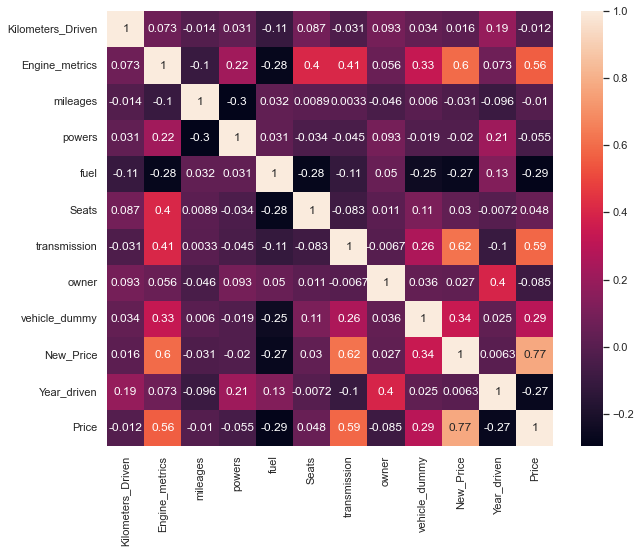

In [44]:
coor = New_df.corr()
features = coor.index
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(New_df[features].corr(), annot = True)

Based on the correlation matrix 
+ Engine Capacity appears to be correlated with the Price of the vehicle as well as the determinant of the New_Price
+ Engine Capacity is also correlated to the Name of the Vehicle, the seats, and Transmission of the vehicle.
+ The Owner type and the amount of year usuage are correlated as well as the power of the vehicle.
+ the Transmission of the vehicle is positively correlated to the Price of the vehicle
+ the vehicle brand and the prices of new and used cars are correlated

In [45]:
New_df = New_df.dropna() #drop all empty entries, this was noticed as some values still had nan entries while updating 

In [46]:
New_df

,Kilometers_Driven,Engine_metrics,mileages,powers,fuel,Seats,transmission,owner,vehicle_dummy,New_Price,Year_driven,Price
0,72000,1,1,1,0,5.000000,0,0,0,5.51,12,1.750000
1,41000,3,1,1,1,5.000000,0,0,1,16.06,7,12.500000
2,46000,2,1,1,2,5.000000,0,0,2,8.61,11,4.500000
3,87000,2,1,1,1,7.000000,0,0,0,11.27,10,6.000000
4,40670,3,1,1,1,5.000000,1,1,3,53.14,9,17.740000
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,89411,2,1,1,1,4.991979,0,0,6,13.23,11,5.307270
7249,59000,2,1,1,2,4.991979,1,0,6,10.15,7,5.307270
7250,28000,2,1,1,1,4.991453,0,0,4,9.47,10,4.738352
7251,52262,2,1,1,2,4.991979,1,2,6,10.15,9,5.307270


In [47]:
New_df['Seats'] = New_df['Seats'].astype(int) #Seats were converted to integers

In [48]:
New_df.isna().sum() 

Kilometers_Driven    0
Engine_metrics       0
mileages             0
powers               0
fuel                 0
Seats                0
transmission         0
owner                0
vehicle_dummy        0
New_Price            0
Year_driven          0
Price                0
dtype: int64

All missing values have been eliminated.

In [49]:
# defining the variables
X = New_df.drop(["Price"], axis=1)
y = New_df["Price"]

In [50]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [51]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 5406
Number of rows in test data = 1803


In [52]:
# fitting the linear model
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [53]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# # function to compute MAPE
# def mape_score(targets, predictions):
#     return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
#     mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2
        },
        index=[0],
    )

    return df_perf

In [54]:
# Checking model performance on train set
lin_reg_model_perf_train = model_performance_regression(lin_model, x_train, y_train)
lin_reg_model_perf_train

,RMSE,MAE,R-squared,Adj. R-squared
0,5.675895,3.088902,0.713738,0.713154


In [55]:
# Checking model performance on test set
lin_reg_model_perf_test = model_performance_regression(lin_model, x_test, y_test)
lin_reg_model_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,5.668496,3.192485,0.738335,0.736727


### Sequential Feature Selection.

In [56]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    verbose=2,
    n_jobs=-1,  # this will ensure all CPU cores are being used for computation
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    2.4s finished

[2022-11-13 22:57:54] Features: 1/11 -- score: 0.5905606785740579[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-11-13 22:57:54] Features: 2/11 -- score: 0.6678595679566712[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-11-13 22:57:54] Features: 3/11 -- score: 0.6986302729201432[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-11-13 22:57:54] Features: 4/11 -- score: 0.70

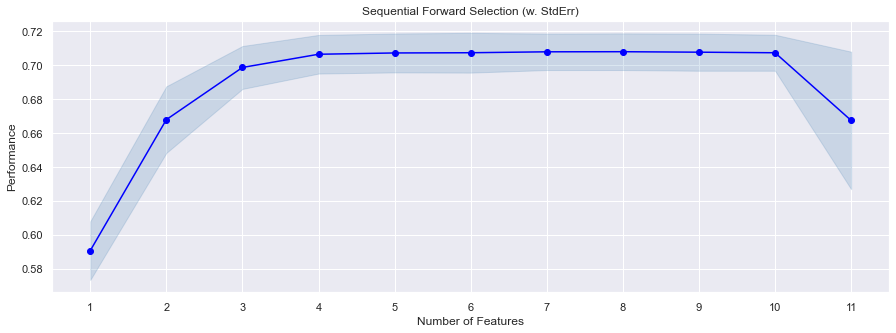

In [57]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.show()

The most important characteristics for my model were chosen using a sequential feature selection method, 
Performance seems to have stabilised at around 4 features.

In [58]:
reg = LinearRegression()

# # Build step forward feature selection
sfs = SFS(
    reg,
    k_features=4,
    forward=True,
    floating=False,
    scoring="r2",
    verbose=2,
    cv=5,
    n_jobs=-1,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-11-13 22:57:55] Features: 1/4 -- score: 0.5905606785740579[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-11-13 22:57:55] Features: 2/4 -- score: 0.6678595679566712[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-11-13 22:57:55] Features: 3/4 -- score: 0.6986302729201432[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-11-13 22:57:56] Features: 4/4 -- score: 0.706426

In [59]:
# important features
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[1, 6, 9, 10]


In [60]:
x_train.columns[feat_cols]

Index(['Engine_metrics', 'transmission', 'New_Price', 'Year_driven'], dtype='object')

In [61]:
x_train2 = x_train[x_train.columns[feat_cols]]

In [62]:
# Creating new x_test with the same 20 variables that we selected for x_train
x_test2 = x_test[x_train2.columns]

In [63]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train2, y_train)

LinearRegression()

In [64]:
# model performance on train set
print("Training Performance:")
lin_reg_model2_perf_train = model_performance_regression(
    lin_reg_model2, x_train2, y_train
)
lin_reg_model2_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared
0,5.72111,3.101774,0.709159,0.708944


In [65]:
# model performance on test set
print("Test Performance:")
lin_reg_model2_perf_test = model_performance_regression(lin_reg_model2, x_test2, y_test)
lin_reg_model2_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared
0,5.737561,3.206005,0.731919,0.731323


In [66]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_perf_train.T, lin_reg_model2_perf_train.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,5.675895,5.721110
MAE,3.088902,3.101774
R-squared,0.713738,0.709159
Adj. R-squared,0.713154,0.708944


In [67]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_perf_test.T, lin_reg_model2_perf_test.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,5.668496,5.737561
MAE,3.192485,3.206005
R-squared,0.738335,0.731919
Adj. R-squared,0.736727,0.731323


### Insights

+ We have a higher RMSE than MAE meaning there exists high errors in the predicted data interpreted as a larger variance magnitude in the results, 
+ based on the target variable, we have a safe RSME value indicating the model fits the data and can predict the data.
+ 74% of the variability observed in the dependent variable is explained by the model 

## Recommendations
Based on the analysis,
+ The most important features in determining the price of the vehicle were the Engine, transmission type, price of a new vehicle and the amount of years the car has been in usage.
+ Inorder to gain higher sales, the engine of the vehicle could be change or updated as it seems to be the most important feature based on the correlation matrix